# Session 8 exercises

These are sample answers for the in-class exercises in Session 8 of PHAS0030.  You should make sure that you can do these yourself! The further work exercises will be in a separate notebook.

In [1]:
# We always start with appropriate imports; note the use of the IPython magic
# command to set up Matplotlib within the notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## 3. Pseudo-random numbers

### Question 1

In [2]:
Natoms = 1000
tmax = 1000 # seconds
dt = 1      # seconds
tau_Tl = 3.053*60 # half-life in seconds
t0_Tl  = tau_Tl/np.log(2.0)
pop_Tl = np.zeros(tmax+1,dtype=int)
pop_Pb = np.zeros(tmax+1,dtype=int)
pop_Tl[0] = Natoms
prob_decay = 1.0 - np.exp(-dt/t0_Tl)
for t in range(tmax):
    prob_samp = np.random.rand(pop_Tl[t]) # Chance for each Tl to decay
    decay_total = np.sum(np.where(prob_samp<prob_decay,1,0))
    pop_Tl[t+1] = pop_Tl[t] - decay_total
    pop_Pb[t+1] = pop_Pb[t] + decay_total

Text(0.5, 1.0, 'Decay of sample of Tl atoms')

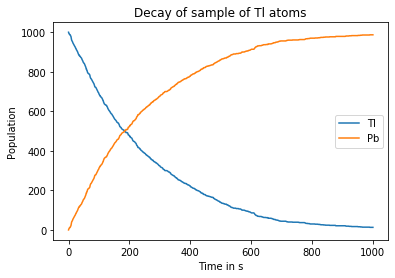

In [3]:
tarr = np.arange(0,tmax+dt,dt)
plt.plot(tarr,pop_Tl,label='Tl')
plt.plot(tarr,pop_Pb,label='Pb')
plt.legend()
plt.xlabel("Time in s")
plt.ylabel("Population")
plt.title("Decay of sample of Tl atoms")

### Question 2

In [4]:
side = 151
mid = 75
traj = np.zeros((side,side))
this_x = mid
this_y = mid
traj[this_x,this_y] = 1
Nsteps = 10000
neigh = np.array([[-1,0],[1,0],[0,-1],[0,1]])
line = np.zeros((Nsteps+1,2))
line[0] = np.array([this_x,this_y])
for i in range(Nsteps):
    # Pick neighbour
    neigh0 = np.random.randint(4)
    this_x += neigh[neigh0,0]
    this_y += neigh[neigh0,1]
    # Hard-wall boundaries
    if(this_x>side-1):
        this_x -= 2
    if(this_y>side-1):
        this_y -= 2
    if(this_x<0):
        this_x += 2
    if(this_y<0):
        this_y += 2
    traj[this_x,this_y] += 1
    line[i+1] = np.array([this_x,this_y])

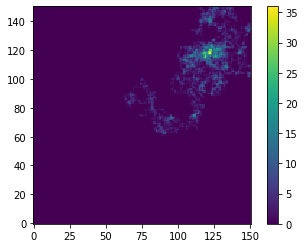

In [5]:
plt.imshow(traj,origin='lower')
plt.colorbar()

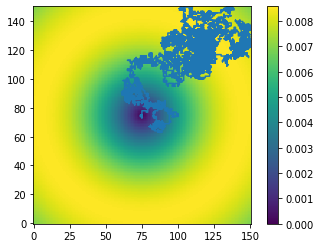

In [6]:
x = np.linspace(-mid,mid,side)
y = np.linspace(-mid,mid,side)
x2d, y2d = np.meshgrid(x,y)
prob_r = 2 * np.sqrt(x2d*x2d + y2d*y2d) * np.exp(-(x2d*x2d+y2d*y2d)/Nsteps) / Nsteps
plt.imshow(prob_r,origin='lower')
plt.colorbar()
plt.plot(line[:,0],line[:,1])

## Probability distributions

### Question 1

In [7]:
def sample_dist(Nsamp,mu,sigma):
    """Average Nsamp samples from random distribution"""
    width = np.sqrt(3*Nsamp)*sigma
    samp = 2.0*width*np.random.random(Nsamp) + mu - width
    return(np.sum(samp)/Nsamp)

### Question 2

In [8]:
Ndist = 10000
Nsamp = 30
mu = 0.0
sigma = 1.0
table = np.zeros(Ndist)
for i in range(Ndist):
    table[i] = sample_dist(Nsamp,mu,sigma)

0.00877446824967749
0.9960777586429136


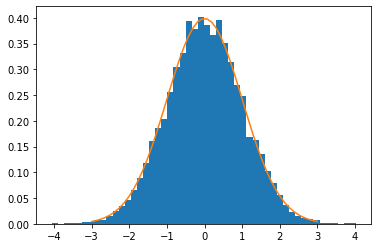

In [9]:
print(np.mean(table))
print(np.std(table))
a = plt.hist(table,bins=50,density=True)
x = np.linspace(-3,3)
sdist = 1.0
from scipy import stats
plt.plot(x,np.exp(-x*x/(2*sdist*sdist))/np.sqrt(2*np.pi*sdist*sdist))

### Question 3

In [10]:
def rejection_method_uniform(n_samples,a,b,h):
    """Rejection method drawing from uniform x from a to b, maximum h"""
    result = np.zeros(n_samples)
    n_accept = 0
    n_counts = 0
    for i in range(n_samples):
        reject = True
        while reject:
            n_counts += 1
            x = (b-a)*np.random.random() + a
            z = h # p(x)
            qx = (1+x*x)*np.exp(-0.5*x*x)/(2*np.sqrt(2*np.pi))
            nx = z*np.random.random()
            if(nx<qx):
                reject = False
                result[n_accept] = x
                n_accept += 1
    print("Ran ",n_counts," tests for ",n_samples," samples")
    return result

### Question 4

In [11]:
Nsamp = 100000
samp_uni   = rejection_method_uniform(Nsamp,-5,5,0.5)

Ran  499057  tests for  100000  samples


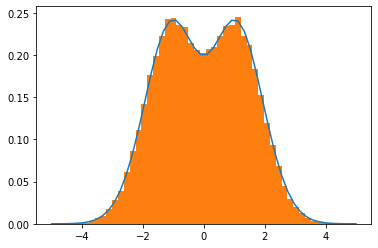

In [12]:
xplot = np.linspace(-5,5)
xplot2 = xplot*xplot
targ = (1+xplot2)*np.exp(-0.5*xplot2)/(2*np.sqrt(2*np.pi))
plt.plot(xplot,targ)
a = plt.hist(samp_uni,bins=50,density=True)

## 5. Monte Carlo methods

### Question 1

In [13]:
def func_int(x):
    """Function to be integrated: x^{-1/3} + x/10"""
    return x**(-1/3) + 0.1*x

### Question 2

In [14]:
for Nsamp in [1e3, 1e4, 1e5, 1e6]:
    total = 0.0
    for i in range(int(Nsamp)):
        thisx = np.random.random()
        total += func_int(thisx)
    print("Integral is ",total/Nsamp," with ",Nsamp," samples")
    print("Error is ",total/Nsamp - 1.55)

Integral is  1.508747362579671  with  1000.0  samples
Error is  -0.04125263742032903
Integral is  1.5692323702695383  with  10000.0  samples
Error is  0.01923237026953828
Integral is  1.5495222365711563  with  100000.0  samples
Error is  -0.0004777634288437582
Integral is  1.5502432211719044  with  1000000.0  samples
Error is  0.00024322117190433978


### Question 3

In [15]:
for Nsamp in [1e3, 1e4, 1e5, 1e6]:
    total = 0.0
    for i in range(int(Nsamp)):
        thisy = np.random.random()
        thisx = thisy**1.5
        total += func_int(thisx)/(2.0/(3.0*thisx**(1/3)))
    print("Integral is ",total/Nsamp," with ",Nsamp," samples")
    print("Error is ",total/Nsamp - 1.55)

Integral is  1.549688147646173  with  1000.0  samples
Error is  -0.0003118523538270246
Integral is  1.5508975443970756  with  10000.0  samples
Error is  0.000897544397075567
Integral is  1.5500263748740828  with  100000.0  samples
Error is  2.6374874082746302e-05
Integral is  1.5500812304022062  with  1000000.0  samples
Error is  8.123040220620048e-05


## 6. Monte Carlo simulations

### Question 1

In [16]:
boxlen = 50
B_over_kT = 0.4
J_over_kT = 0.0
spins = (-1)**np.random.randint(0,2,size=(boxlen,boxlen))

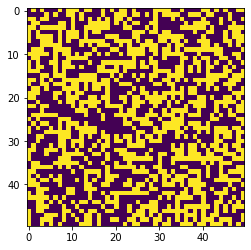

In [17]:
plt.imshow(spins)

### Question 2

In [18]:
sum_neigh_spins = (np.roll(spins,1,axis=0)+np.roll(spins,-1,axis=0)+
                   np.roll(spins,1,axis=1)+np.roll(spins,-1,axis=1))
etot = -np.sum(spins*(B_over_kT + J_over_kT*sum_neigh_spins))
print("Starting energy is ",etot)

Starting energy is  26.399999999999995


### Question 3

In [19]:
def update(i,j):
    """Update move for MC Ising model"""
    im = (i-1)%boxlen
    ip = (i+1)%boxlen
    jm = (j-1)%boxlen
    jp = (j+1)%boxlen
    sum_neigh_spins = spins[im,j] + spins[ip,j] + spins[i,jm] + spins[i,jp]
    # The change in energy accounts for flip from -1 to +1 or vice versa
    de = 2*spins[i,j]*(J_over_kT*sum_neigh_spins + B_over_kT)
    p = np.exp(-de)
    if de<0 or p > np.random.random():
        spins[i,j] = -spins[i,j]
    else:
        de = 0.0
    return de

### Question 4

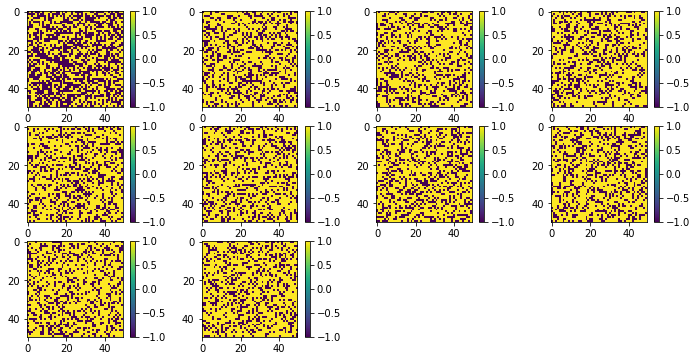

In [20]:
Nsteps = 50000
long_range_order = np.zeros(Nsteps+1)
etot = np.zeros(Nsteps+1)
long_range_order[0] = np.sum(spins)/np.size(spins)
sum_neigh_spins = (np.roll(spins,1,axis=0)+np.roll(spins,-1,axis=0)+
                   np.roll(spins,1,axis=1)+np.roll(spins,-1,axis=1))
etot[0] = -np.sum(spins*(B_over_kT + J_over_kT*sum_neigh_spins))
figIsing = plt.figure(figsize=(12,6))
index = 1
spin_total = 0
spin2_total = 0
for i in range(Nsteps):
    this_i = np.random.randint(boxlen)
    this_j = np.random.randint(boxlen)
    de = update(this_i,this_j)
    sum_neigh_spins = (np.roll(spins,1,axis=0)+np.roll(spins,-1,axis=0)+
                       np.roll(spins,1,axis=1)+np.roll(spins,-1,axis=1))
    etot[i+1] = -np.sum(spins*(B_over_kT + J_over_kT*sum_neigh_spins))
    long_range_order[i+1] = np.sum(spins)/np.size(spins)
    spin_total += np.sum(spins)/np.size(spins)
    spin2_total += np.sum(spins)*np.sum(spins)/(np.size(spins)*np.size(spins))
    if i%5000==0:
        ax = figIsing.add_subplot(3,4,index)
        image = ax.imshow(spins)
        plt.colorbar(mappable=image)
        index +=1 

### Question 5

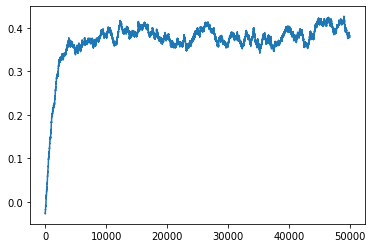

In [21]:
plt.plot(long_range_order)

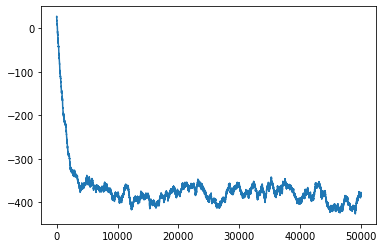

In [22]:
plt.plot(etot)

In [23]:
ave_spin = spin_total/(Nsteps)
print("Ave spin2: ",spin2_total/Nsteps)
sd_spin = np.sqrt(spin2_total/Nsteps - ave_spin*ave_spin)
print("Average spin: ",ave_spin," with SD ",sd_spin)

Ave spin2:  0.14009593836800255
Average spin:  0.37087265599998326  with SD  0.05049169634227632


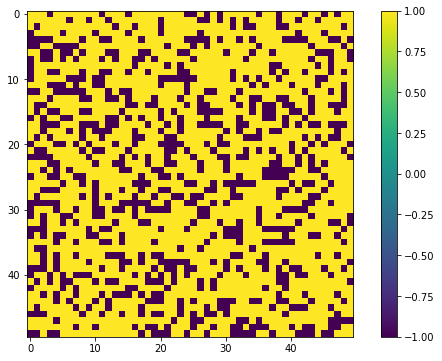

In [24]:
figTest = plt.figure(figsize=(10,6))
ax = figTest.add_subplot(111)
image = ax.imshow(spins)
plt.colorbar(mappable=image)